In [55]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import SVG
from sklearn.neighbors import NearestNeighbors
import random
from sklearn.tree import export_graphviz
from graphviz import Source

In [57]:
df = pd.read_csv('winequality-red.csv', delimiter= ";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
df['quality'] = df['quality'].apply(lambda x : 0 if x <=5 else 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [59]:
df.quality.unique()

array([0, 1])

In [60]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: >

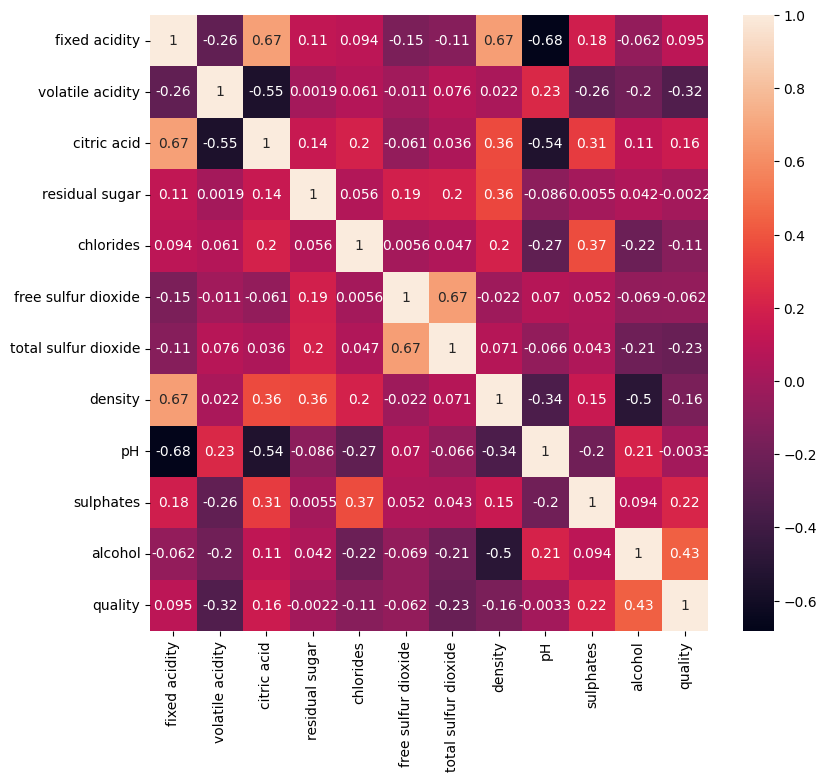

In [61]:
# finding the highest correlated attributes by generating the heat map

corr_matrix = df.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(corr_matrix, annot=True)

In [62]:
# getting the best features of the wine data from the heat map

corr_matrix = df.corr()
corr_with_target = abs(corr_matrix['quality']).sort_values(ascending=False)
best_features = corr_with_target[1:6].index.tolist()
print("Best features based on correlation analysis: ", best_features)

Best features based on correlation analysis:  ['alcohol', 'volatile acidity', 'total sulfur dioxide', 'sulphates', 'citric acid']


In [63]:
# create a list of feature columns

feature_cols = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide']

In [64]:
# define X and y

X = df[feature_cols]
y = df.quality

alcohol: 0.8534468516082325
volatile acidity: 0.0
sulphates: 0.14655314839176745
citric acid: 0.0
total sulfur dioxide: 0.0


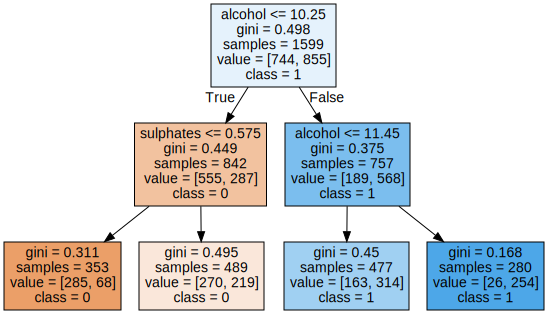

In [65]:
# decision tree with max_depth=2

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
# train decision tree with max_depth=2
tree2 = DecisionTreeClassifier(max_depth=2,random_state=1)
tree2.fit(X, y)
# print feature importances
for name, importance in zip(feature_cols, tree2.feature_importances_):
    print(f"{name}: {importance}")
    
graph = Source(export_graphviz(tree2, out_file=None,
                               feature_names=feature_cols,
                               class_names=['0','1'],#'3', '4', '5', '6', '7', '8'],
                               filled=True))
svg = SVG(graph.pipe(format='svg'))
display(svg)

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score, auc, precision_recall_curve


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

params = {
    # 'C': [0.1, 1, 10, 100], 
    # 'penalty':['l2'],
    'class_weight': ['balanced'],
}

# Train decision tree with max_depth=2
tree2 = DecisionTreeClassifier(max_depth=2,random_state=1)
# tree2.fit(X_train, y_train)
gs = GridSearchCV(estimator=tree2, param_grid=params, cv=3, refit=True, scoring='accuracy')
gs.fit(X_train, y_train)

for param_name, param_value in gs.best_params_.items():
    print('{}:\t{}'.format(param_name, str(param_value)))

# Use score method to get accuracy of model
print(gs.best_score_)
y_pred = gs.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p[0]))
display('recall = {}'.format(r[0]))
display('f-score = {}'.format(f[0]))

class_weight:	balanced
0.6770898615738145


'precision = 0.6724137931034483'

'recall = 0.7597402597402597'

'f-score = 0.7134146341463414'

alcohol: 0.5091813094225128
volatile acidity: 0.09609707716101944
sulphates: 0.22966563969990947
citric acid: 0.02057261994318562
total sulfur dioxide: 0.14448335377337274


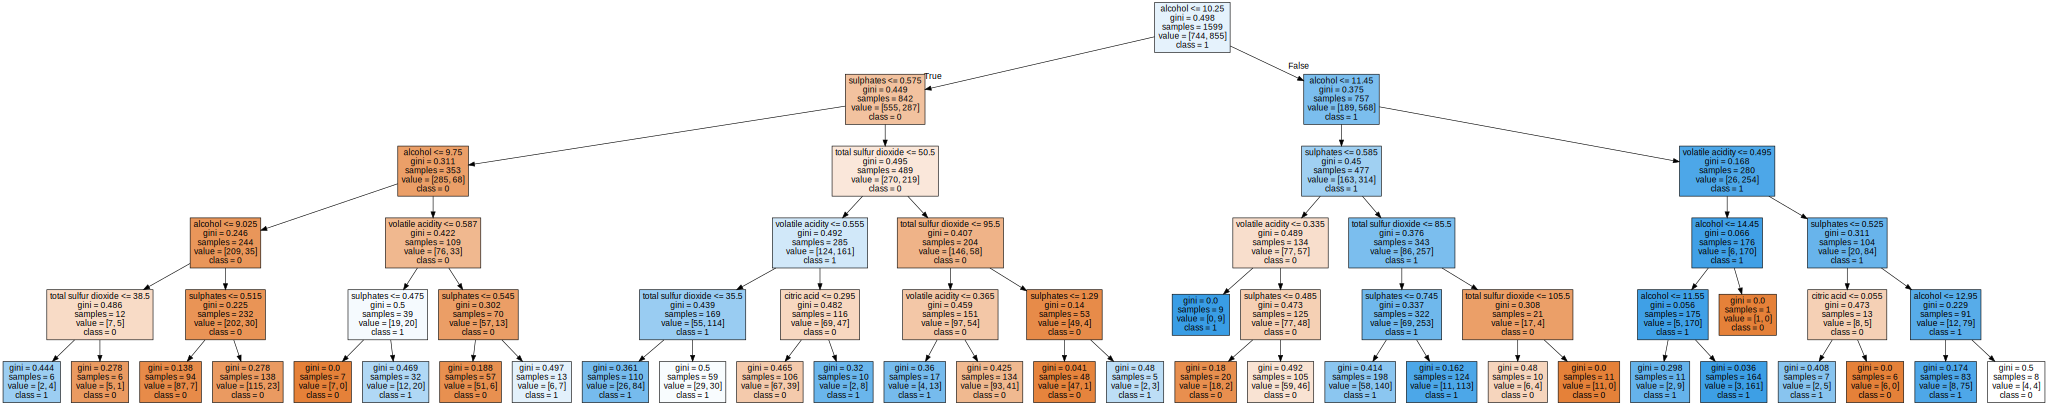

'wine_quality_tree5.png'

In [67]:
# create a decision tree classifier with max_depth=5
tree5 = DecisionTreeClassifier(max_depth=5, random_state=1)
tree5.fit(X, y)

for name, importance in zip(feature_cols, tree5.feature_importances_):
    print(f"{name}: {importance}")
    
# generate the Graphviz representation of the decision tree
graph5 = Source(export_graphviz(tree5, out_file=None,
                               feature_names=feature_cols,
                               class_names=['0', '1'],
                               filled=True)) 
svg5 = SVG(graph5.pipe(format='svg'))
display(svg5)
graph5.render('wine_quality_tree5', format='png', view=True)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

params = {
    # 'C': [0.1, 1, 10, 100], 
    # 'penalty':['l2'],
    'class_weight': ['balanced'],
}

# Train decision tree with max_depth=5
tree5 = DecisionTreeClassifier(max_depth=5,random_state=1)
# tree2.fit(X_train, y_train)
gs = GridSearchCV(estimator=tree5, param_grid=params, cv=3, refit=True, scoring='accuracy')
gs.fit(X_train, y_train)

for param_name, param_value in gs.best_params_.items():
    print('{}:\t{}'.format(param_name, str(param_value)))

# Use score method to get accuracy of model
print(gs.best_score_)
y_pred = gs.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p[0]))
display('recall = {}'.format(r[0]))
display('f-score = {}'.format(f[0]))

class_weight:	balanced
0.7240290559385457


'precision = 0.7267080745341615'

'recall = 0.7597402597402597'

'f-score = 0.7428571428571429'

alcohol: 0.33635651129655386
volatile acidity: 0.17599589877736746
sulphates: 0.17842758044361395
citric acid: 0.13491783957034426
total sulfur dioxide: 0.1743021699121204


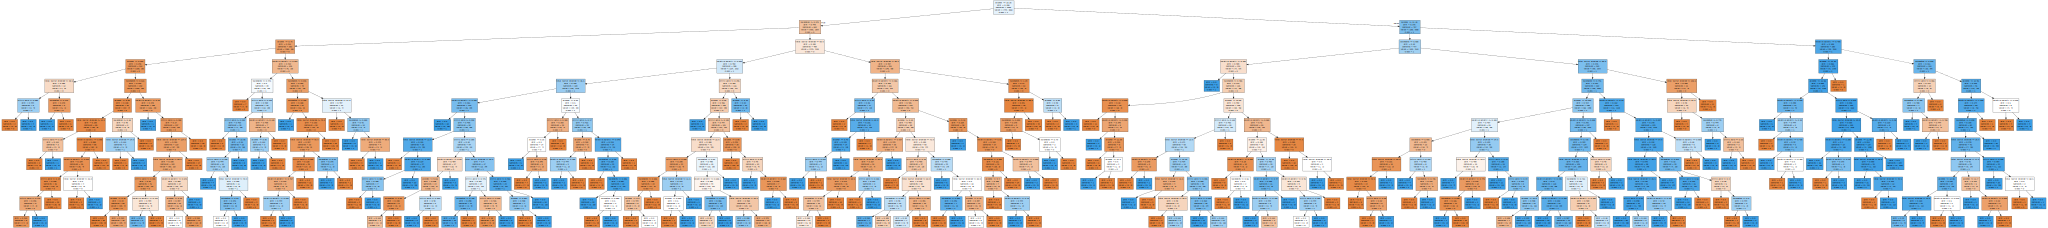

'wine_quality_tree5.png'

In [69]:
# create a decision tree classifier with max_depth=5
tree5 = DecisionTreeClassifier(max_depth=11, random_state=1)
tree5.fit(X, y)

for name, importance in zip(feature_cols, tree5.feature_importances_):
    print(f"{name}: {importance}")
    
# generate the Graphviz representation of the decision tree
graph11 = Source(export_graphviz(tree5, out_file=None,
                               feature_names=feature_cols,
                               class_names=['0', '1'],
                               filled=True)) 
svg5 = SVG(graph11.pipe(format='svg'))
display(svg5)
graph11.render('wine_quality_tree5', format='png', view=True)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

params = {
    # 'C': [0.1, 1, 10, 100], 
    # 'penalty':['l2'],
    'class_weight': ['balanced'],
}

# Train decision tree with max_depth=5
tree5 = DecisionTreeClassifier(max_depth=11,random_state=1)
# tree2.fit(X_train, y_train)
gs = GridSearchCV(estimator=tree5, param_grid=params, cv=3, refit=True, scoring='accuracy')
gs.fit(X_train, y_train)

for param_name, param_value in gs.best_params_.items():
    print('{}:\t{}'.format(param_name, str(param_value)))

# Use score method to get accuracy of model
print(gs.best_score_)
y_pred = gs.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p[0]))
display('recall = {}'.format(r[0]))
display('f-score = {}'.format(f[0]))

class_weight:	balanced
0.7138495820093604


'precision = 0.732484076433121'

'recall = 0.7467532467532467'

'f-score = 0.7395498392282958'

Neural Networks

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [71]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
X = df.drop(['quality'],axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [73]:
# you may need to install networkx with pip
import networkx as nx
import colorsys

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)

In [74]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [75]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
mlp1 = MLPClassifier(hidden_layer_sizes=(2, 2),max_iter=500)
mlp1.fit(X_train,y_train)
predictions = mlp1.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[149  53]
 [ 48 150]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       202
           1       0.74      0.76      0.75       198

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



In [77]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp1.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp1.coefs_)):
    m = len(mlp1.coefs_[l])
    n = len(mlp1.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp1.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp1.intercepts_[l]) for l,_ in enumerate(mlp1.intercepts_)]))

This dataset has 11 input nodes and 2 output node(s)
There are 3 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 11x2 (11 nodes feeding into a layer of 2 nodes)
  1: 2x2 (2 nodes feeding into a layer of 2 nodes)
  2: 2x1 (2 nodes feeding into a layer of 1 nodes)

There are 3 1D arrays of intercepts, one for each layer
Each layer has [2, 2, 1] intercepts, one for each node


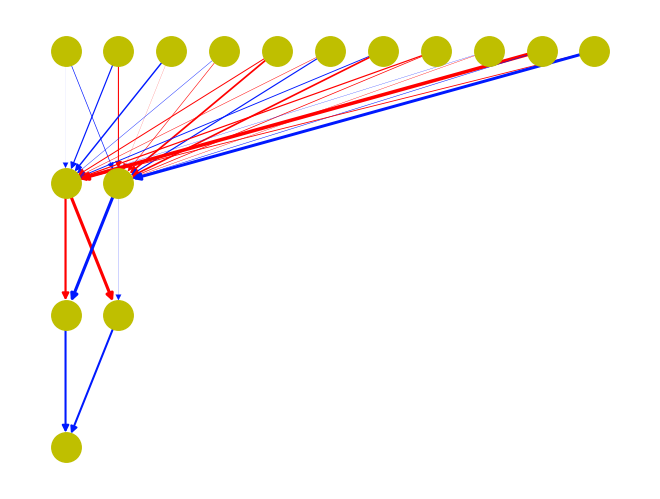

In [78]:
show_ann(mlp1)

In [79]:
mlp2 = MLPClassifier(hidden_layer_sizes=(15, 15, 15),max_iter=10000)
mlp2.fit(X_train,y_train)
predictions = mlp2.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[142  60]
 [ 50 148]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       202
           1       0.71      0.75      0.73       198

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.72       400
weighted avg       0.73      0.72      0.72       400



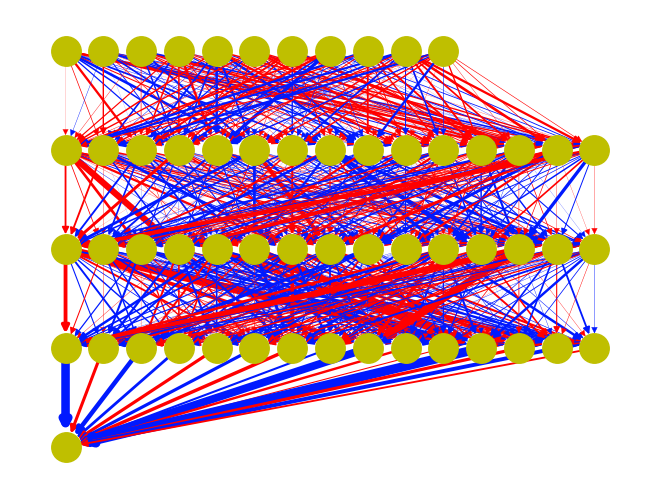

In [80]:
show_ann(mlp2)

In [81]:
mlp3 = MLPClassifier(hidden_layer_sizes=(30, 30, 15),max_iter=10000)
mlp3.fit(X_train,y_train)
predictions = mlp3.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[135  67]
 [ 35 163]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       202
           1       0.71      0.82      0.76       198

    accuracy                           0.74       400
   macro avg       0.75      0.75      0.74       400
weighted avg       0.75      0.74      0.74       400



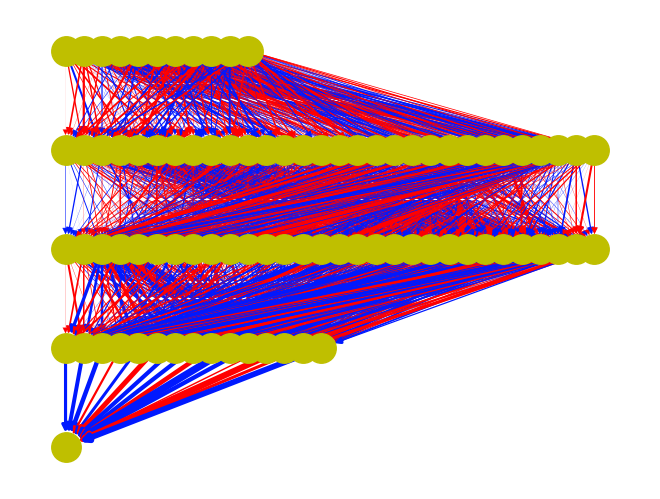

In [82]:
show_ann(mlp3)